In [119]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

# 운영체제별 폰트 설정
if platform.system() == 'Windows':
    font_name = 'Malgun Gothic'   # 윈도우 기본 한글 폰트
elif platform.system() == 'Darwin':  # macOS
    font_name = 'AppleGothic'
else:  # Linux (예: Ubuntu, WSL 등)
    font_name = 'NanumGothic'

rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
print(f"✅ 현재 적용된 폰트: {font_name}")

✅ 현재 적용된 폰트: Malgun Gothic


In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 불러오기
# 사용하는 환경에 따라 주석처리 해서 사용
df = pd.read_csv("C:/Users/user/ai_job/ai_job_market.csv") # 주피터 용
# df = pd.read_csv("/content/ai_job_market.csv") # 코랩 용
# 코랩에서 사용할때는 csv파일 업로드 해주셔야 합니다.

# 전처리
'''
컬럼 지정, salary_range_usd "-" 뒤의 값 삭제, posted_date 날짜 삭제, location ','앞의 값 삭제(도시 제거),
skills_required, tools_preferred 리스트 화, experience_level, employment_type, company_size 코드 지정
'''
# 사용할 컬럼 지정
use_cols = (['industry', 'job_title', 'skills_required',
       'experience_level', 'employment_type', 'location', 'salary_range_usd',
       'posted_date', 'company_size', 'tools_preferred'])
df = df[use_cols].copy()

# salary_range_usd "-" 뒤의 값 삭제 - 앞의 숫자 초봉이라 가정
df['salary_range_usd'] = df['salary_range_usd'].str.replace('-[^-]*$', '', regex=True)

# posted_date 날짜 삭제
df['posted_date'] = df['posted_date'].str.replace('-[^-]*$', '', regex=True)

# location ','앞의 값 삭제(도시 제거)
df['location'] = df['location'].str.replace('.*,', '', regex=True)

# skills_required 리스트 화
# df['skills_required'] = (
#     df['skills_required']
#     .dropna()       # 결측치 제거
#     .apply(lambda x: [skill.strip() for skill in x.split(',')])  # 공백 제거 후 리스트화
# )

# tools_preferred 리스트 화
df['tools_preferred'] = (
    df['tools_preferred']
    .dropna()       # 결측치 제거
    .apply(lambda x: [skill.strip() for skill in x.split(',')])  # 공백 제거 후 리스트화
)

# experience_level 코드화 {Entry(신입): 0, Mid(경력): 1, Senior(시니어): 3}
df["experience_level"] = df["experience_level"].map({"Entry": 0, "Mid": 1, 'Senior': 2})

# employment_type 코드화 {Contract(계약직): 0, Remote(프리렌서): 1, Internship(인턴십): 2, , Full-time(정규직): 3}
df["employment_type"] = df["employment_type"].map({"Contract": 0, "Remote": 1, 'Internship': 2, 'Full-time': 3})

# company_size 코드화 {Startup(스타트업): 0, Mid(중소기업): 1, Large(대기업): 2}
df["company_size"] = df["company_size"].map({"Startup": 0, "Mid": 1, 'Large': 2})

df

,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred
0,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",1,3,AR,92860,2025-08,2,"[KDB+, LangChain]"
1,Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",2,3,CU,78523,2024-03,2,"[FastAPI, KDB+, TensorFlow]"
2,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",0,3,CM,124496,2025-09,2,"[BigQuery, PyTorch, Scikit-learn]"
3,Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",1,3,FI,50908,2024-05,2,"[TensorFlow, BigQuery, MLflow]"
4,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",2,0,NE,98694,2025-02,2,"[PyTorch, LangChain]"
...,...,...,...,...,...,...,...,...,...,...
1995,Finance,NLP Engineer,"Flask, FastAPI, Power BI",2,2,SD,90382,2024-04,2,[MLflow]
1996,Automotive,AI Product Manager,"R, Flask, Excel, C++, CUDA, Scikit-learn",1,1,ZA,47848,2023-12,2,"[KDB+, LangChain, MLflow]"
1997,Education,Data Analyst,"Hugging Face, Excel, Scikit-learn, R, MLflow",0,0,CG,134994,2023-10,2,[PyTorch]
1998,Education,Quant Researcher,"AWS, Python, Scikit-learn",2,0,OM,62388,2024-08,2,"[MLflow, TensorFlow, FastAPI]"


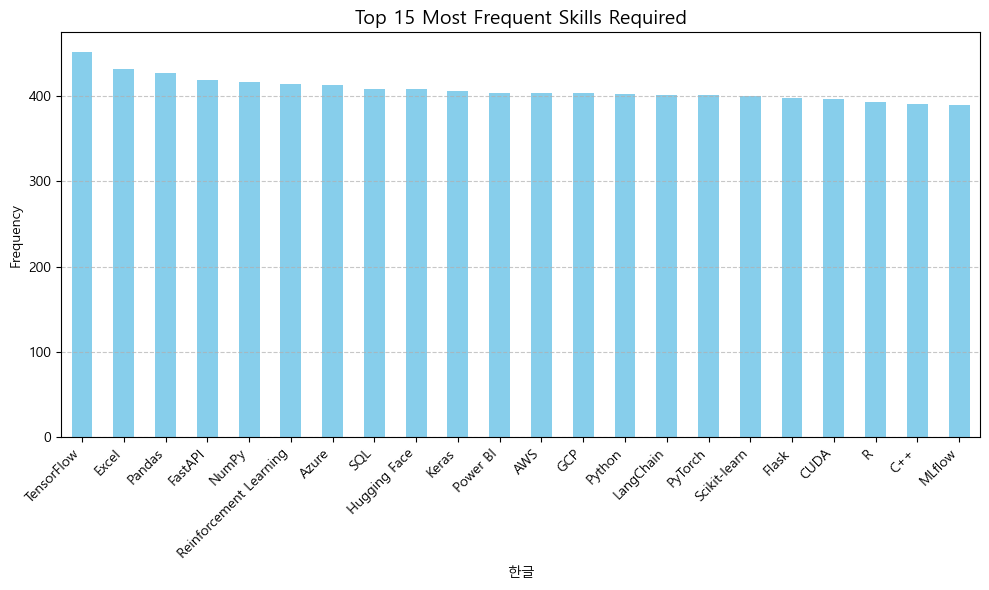

In [120]:
skills_series = (
    df['skills_required']
    .dropna()
    .str.split(',')          # 콤마 기준 분리
    .explode()               # 리스트 풀기
    .str.strip()             # 공백 제거
)

# 기술별 등장 횟수 계산
skill_counts = skills_series.value_counts()

# 상위 15개 기술만 시각화
plt.figure(figsize=(10,6))
skill_counts.plot(kind='bar', color='skyblue')
plt.title('Top 15 Most Frequent Skills Required', fontsize=14)
plt.xlabel('한글')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()